## performance du modèle  =  données de QUALITE 

APRES l'analyse de mes donnees/  c'est a dire  comment ils se presentent sur le plan univarié et bivarié.

sont t'ils de qualités?

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [7]:
df.CHAS = df.CHAS.astype("category")
df.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD           int64
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
MEDV        float64
dtype: object

## identification et traitement des valeurs manquantes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    int64   
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(1), float64(12), int64(1)
memory usage: 52.1 KB


### ma base n'a pas de valeurs manquantes

In [67]:
nb_missing_values = df.isnull().sum()
nb_missing_values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [22]:
!pip install missingno

In [69]:
import missingno as msno

<Axes: >

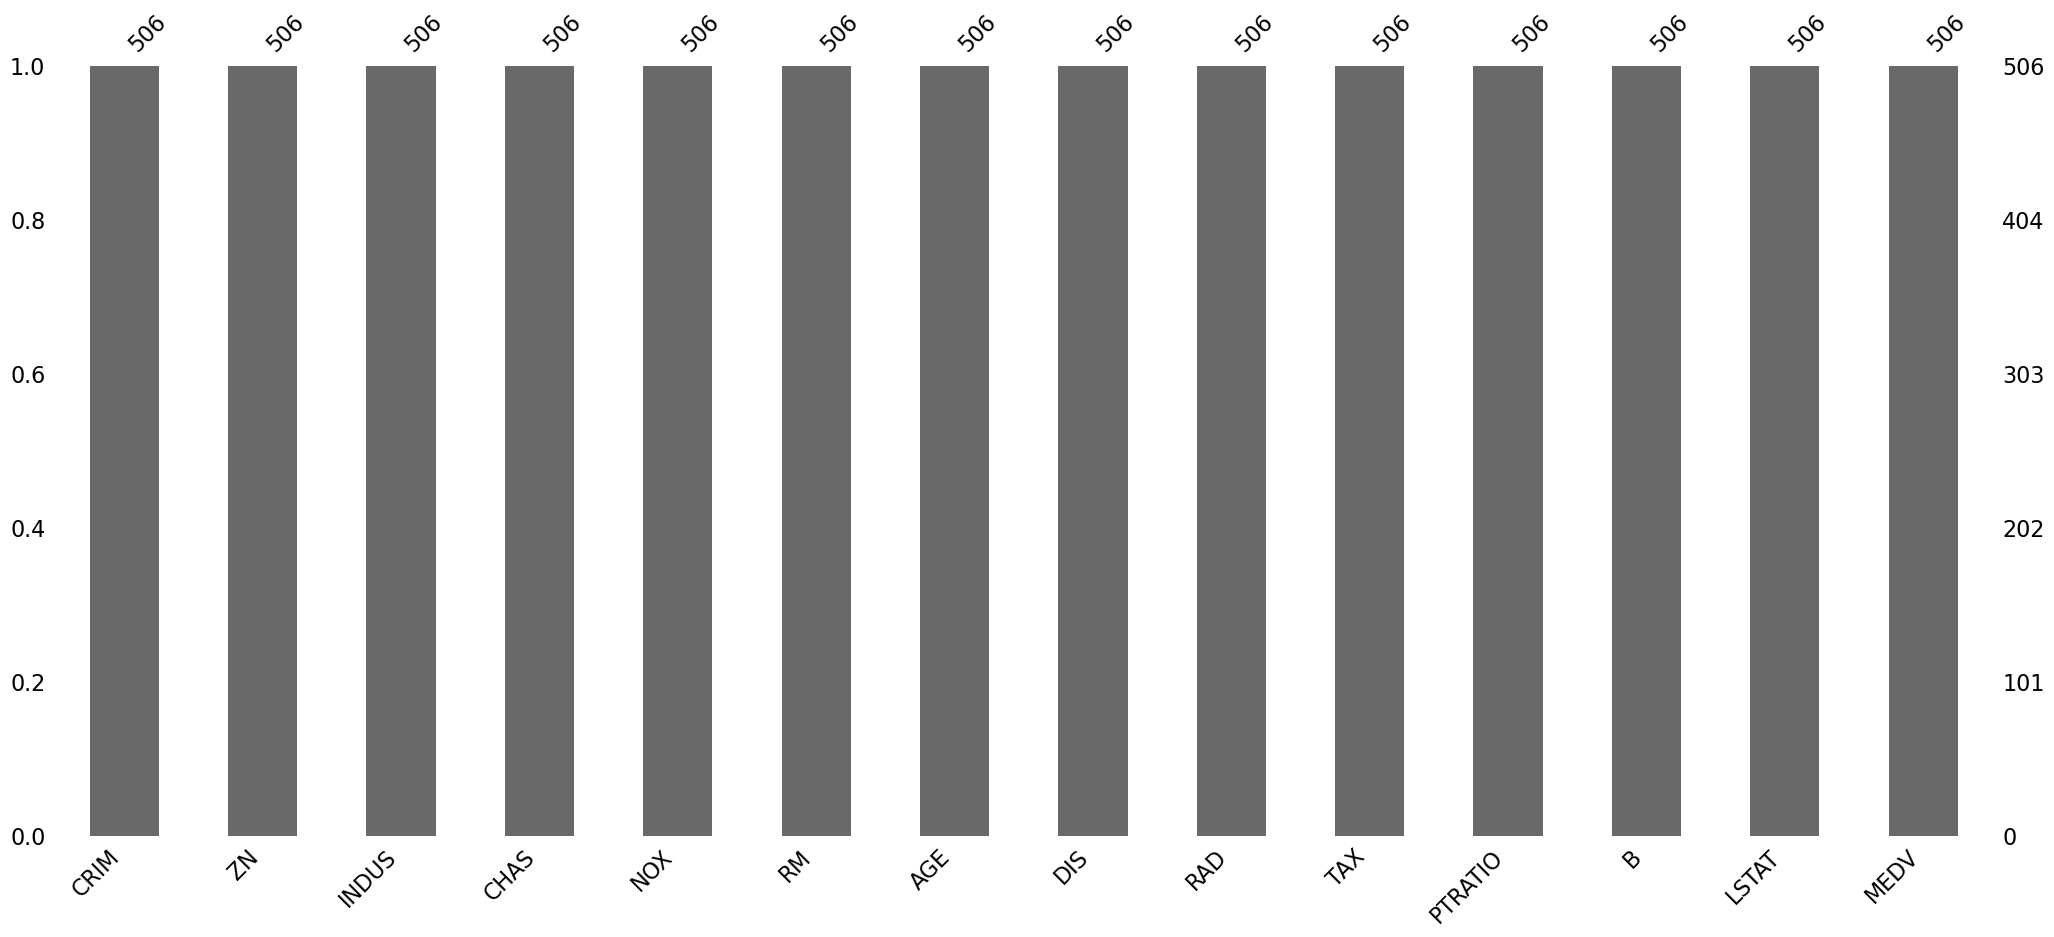

In [71]:
msno.bar(df)

##  pour les Variables qualitatives

### identification des modalités rare

toutes les modalités de chaque variable quali doit etre assez diversifiée entre la population , chaque modalité doit bien etre reppresentée au moins 5% en proportion 
au cas contraire si une modalité est rare , sa risque causer les problèmes d'instabilité de notre modélisation

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
variable_quali = df.select_dtypes( exclude = "number")
variable_quali

,CHAS
0,0
1,0
2,0
3,0
4,0
...,...
501,0
502,0
503,0
504,0


In [77]:
frequence = df.CHAS.value_counts()
frequence

CHAS
0    471
1     35
Name: count, dtype: int64

In [79]:
proportion =  df.CHAS.value_counts( normalize = True)*100
proportion

CHAS
0    93.083004
1     6.916996
Name: proportion, dtype: float64

C:\Users\tchaf\anaconda3\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


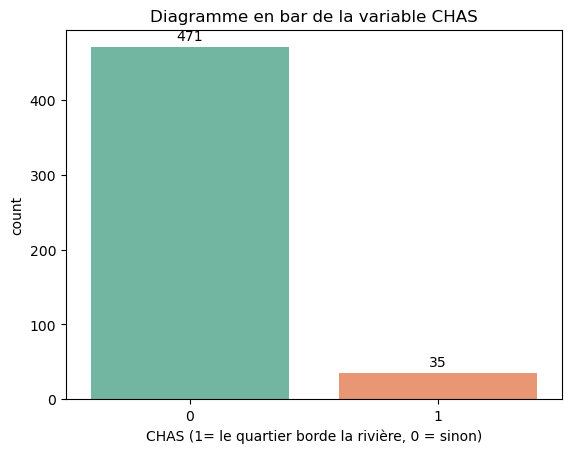

In [81]:
ax = sns.countplot(x = "CHAS", data= df, palette = "Set2")
ax.bar_label(ax.containers[0], padding = 3)
plt.title("Diagramme en bar de la variable CHAS")
plt.xlabel("CHAS (1= le quartier borde la rivière, 0 = sinon)")
plt.show()

C:\Users\tchaf\anaconda3\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


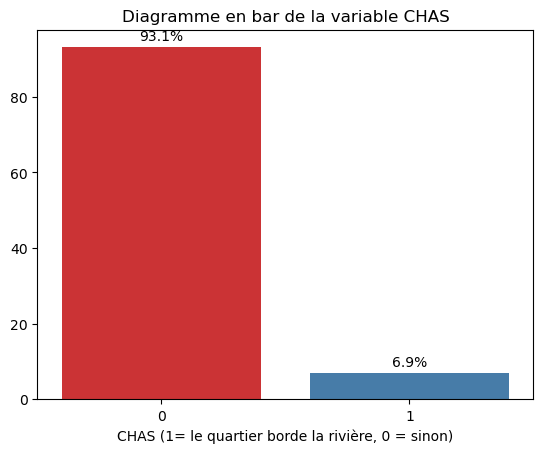

In [83]:
ax = sns.barplot(x = proportion.index , y = proportion.values, palette = "Set1")
ax.bar_label(ax.containers[0], fmt = "%.1f%%",  padding = 3)
plt.title("Diagramme en bar de la variable CHAS")
plt.xlabel("CHAS (1= le quartier borde la rivière, 0 = sinon)")
plt.show()

on voit que ma modalité est assez representative, on a au moins 5% en proportion

## pour variables quantitatives

## identification et traitement des Outlier 

In [119]:
variable_quanti = df.select_dtypes(include = "number")
variable_quanti

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


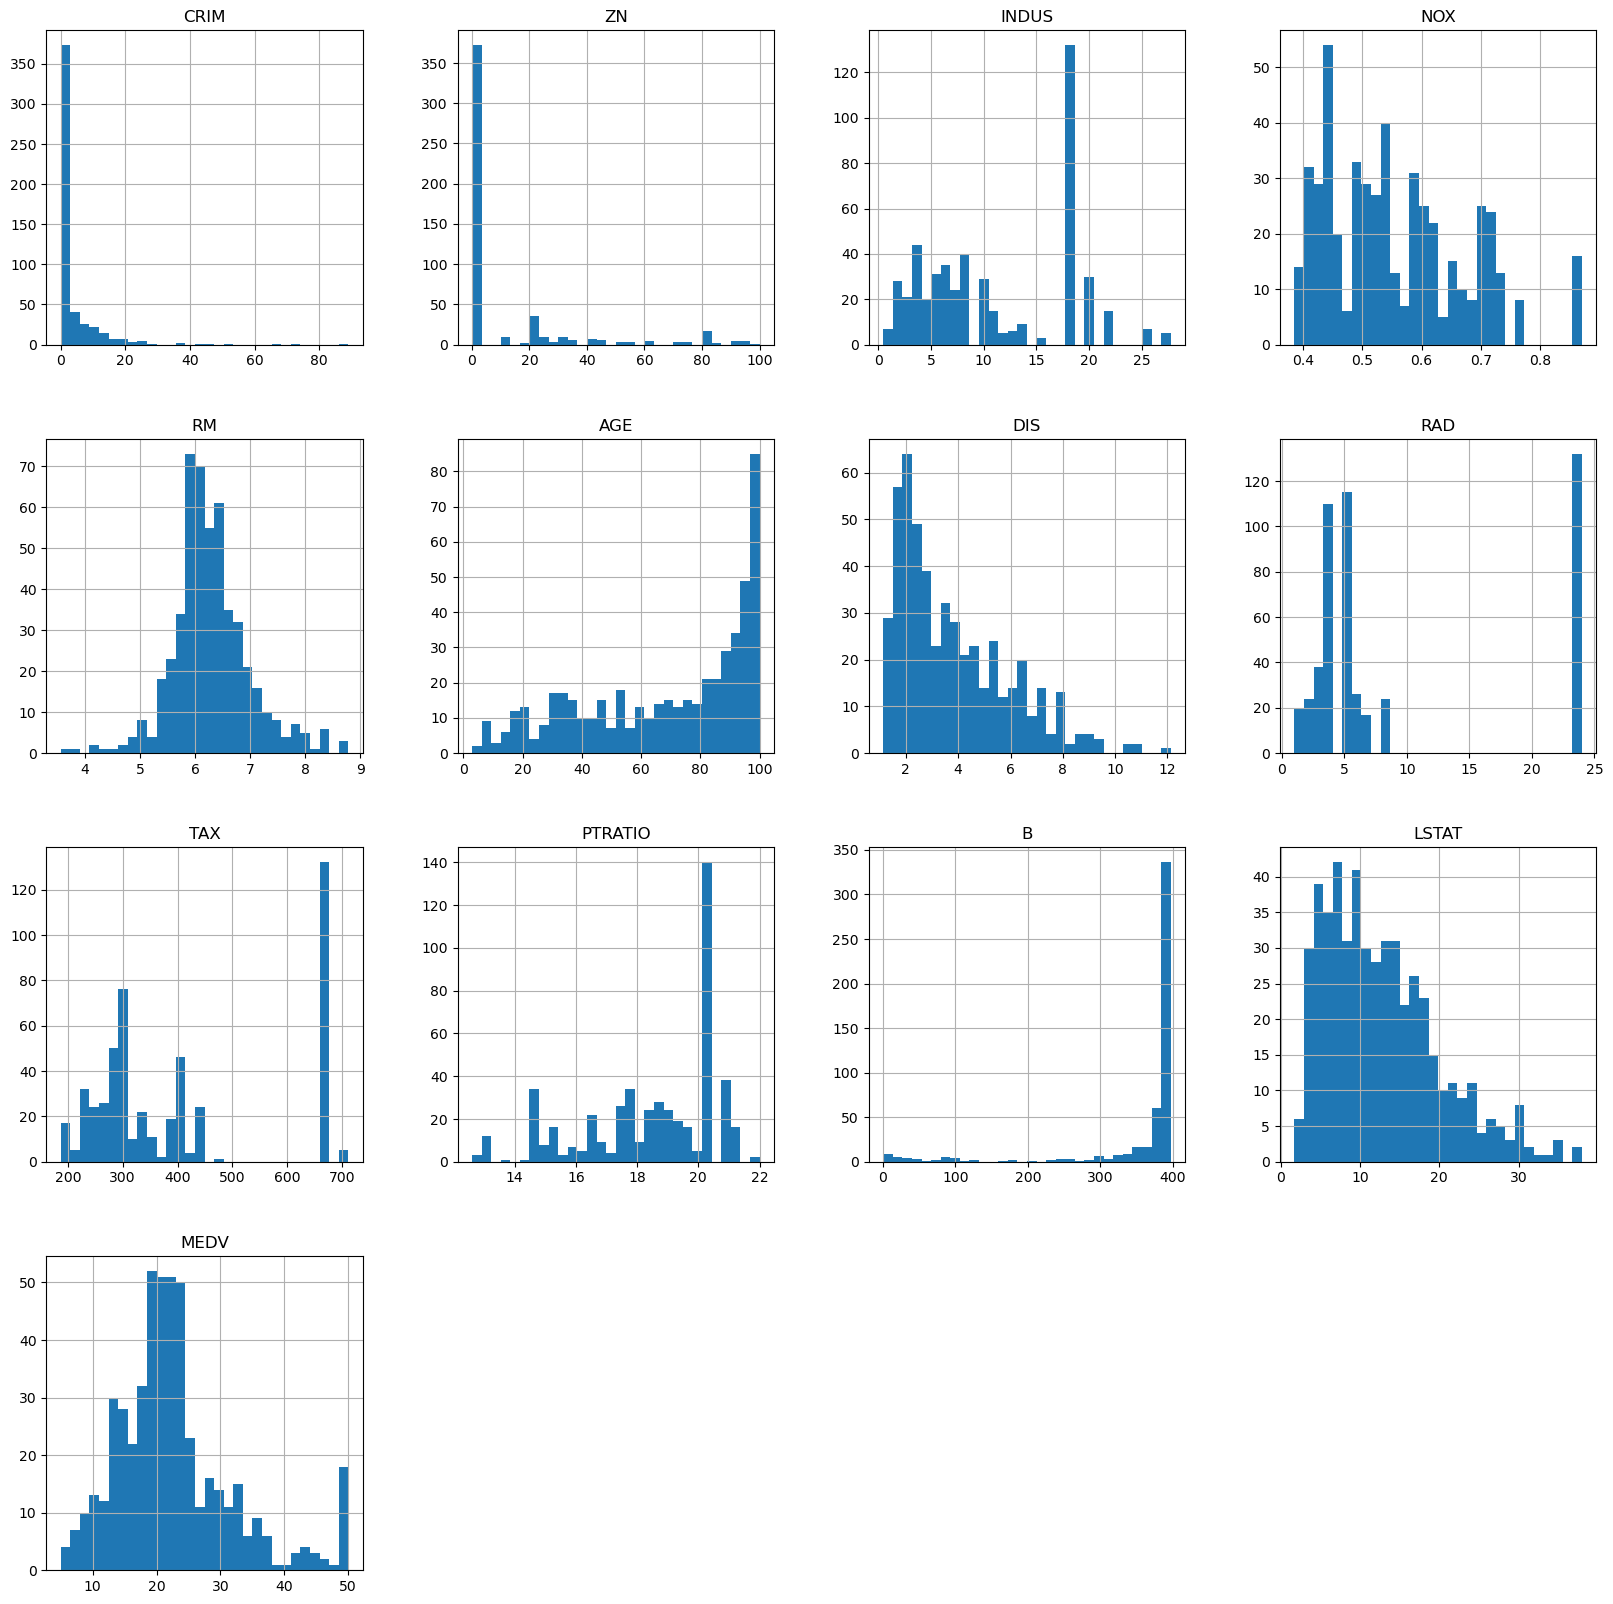

In [87]:
df.hist(bins = 30, figsize = (20, 20))
plt.show()

sur l'histogramme ces valeurs aberrante sont ceux la qui s'ecartent assez de l'intervalle ou la variables est majoritairement distribuée

- technique IQR: mettre en place le boxplot

- technique z_score

se sont des techniques d'identification des outlier d'un point de vue univaré.


- isolation forest

technique d'identification des outliers d'un point de vu multivariée( sa prend au moins 2 variables, cad une variable est outlier tout simplement parceque l'autre l'est aussi, il peut avoir les relation entre les outlier autant mieux mettre en place cette technique multivariée)

NOTA: concentrons nous plus sur IRQ et ZSCORE
car une variables sur le plan MULTIVARIE  peut ne pas etre outlier, mais sur le plan UNIVARIE  sa l'est donc je dois le faire variable par variable

## technique IQR

selon le THEOREME CENTRALE LIMITE: j'ai plus de 30 observations dans ma base donc on peut dire que statistiquement mes variables converge vers la loi normale, meme si le test nous dit le contraire


In [121]:
liste_variable_quanti = variable_quanti.columns.to_list()
liste_variable_quanti

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

liste_variable_quanti = df.select_dtypes(include="number")

def valeurs_extremes(liste_variable_quanti):

    Outlier_dict = {}
    
    # Convertir les noms des colonnes en liste
    liste_variable_quanti = liste_variable_quanti.columns.tolist()
    
    
    for i in liste_variable_quanti:
        # Tracer le boxplot pour chaque variable
        sns.boxplot(df[i])
        plt.title(f"Boxplot pour la variable {i}")
        plt.show()
        
        # Calcul de Q1, Q3 et IQR
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calcul des bornes inférieure et supérieure
        borne_inf = Q1 - 1.5 * IQR
        borne_sup = Q3 + 1.5 * IQR  # Correction de 'borne_sup'
        
        # Identifier les valeurs extrêmes
        Outlier_IQR = df[(df[i] < borne_inf) | (df[i] > borne_sup)]
        
        # Stocker les valeurs extrêmes pour la variable
        Outlier_dict[i] = Outlier_IQR

    return Outlier_dict


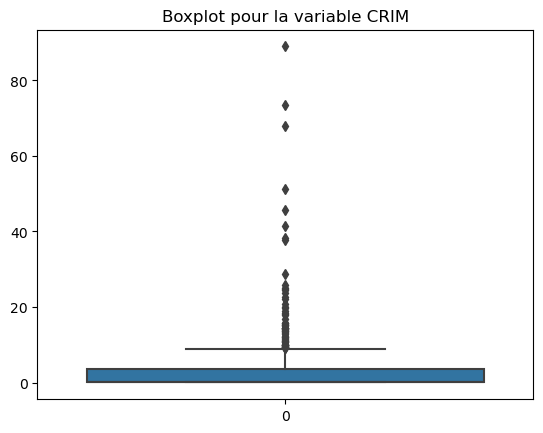

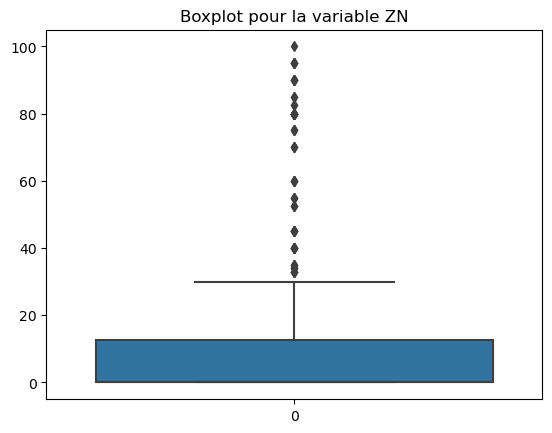

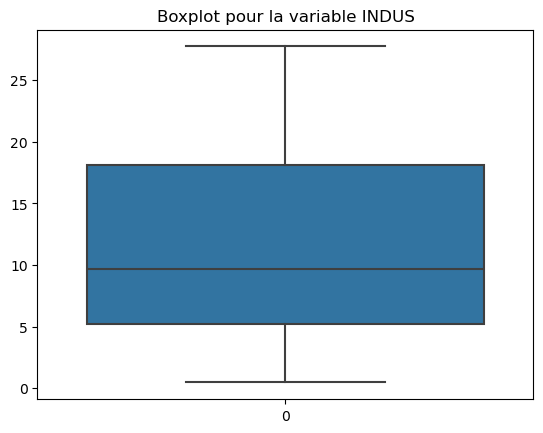

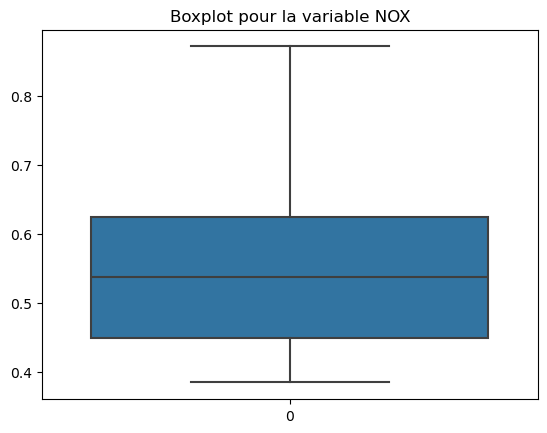

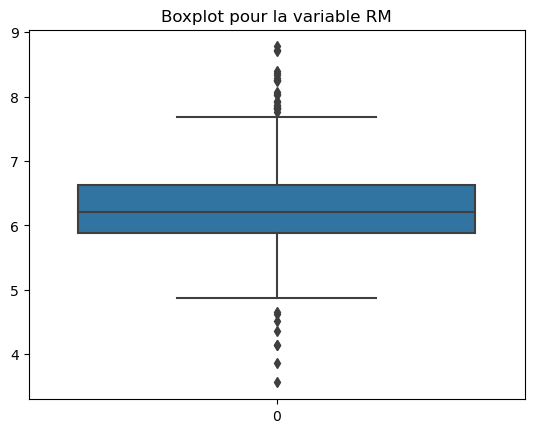

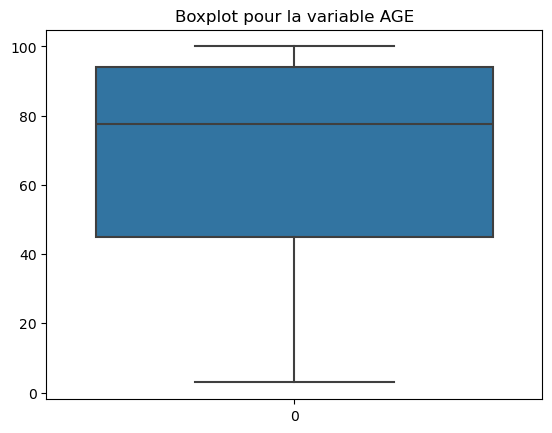

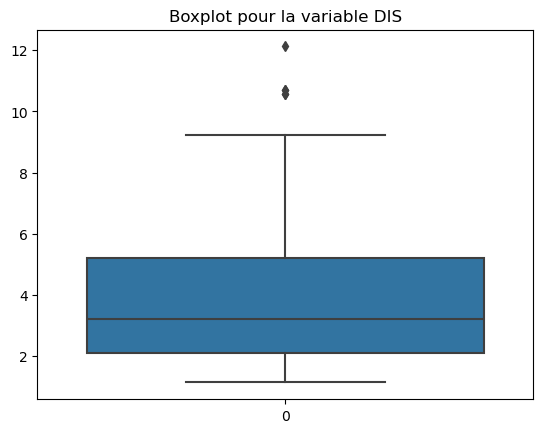

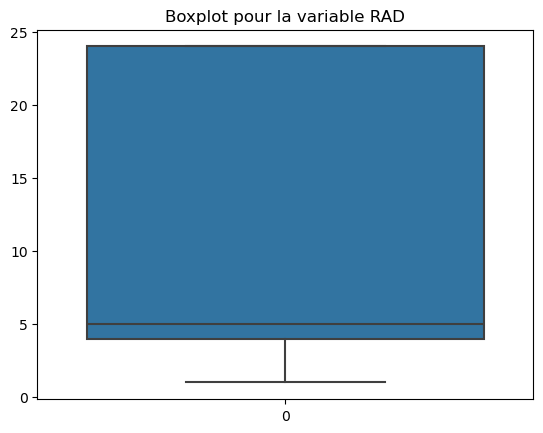

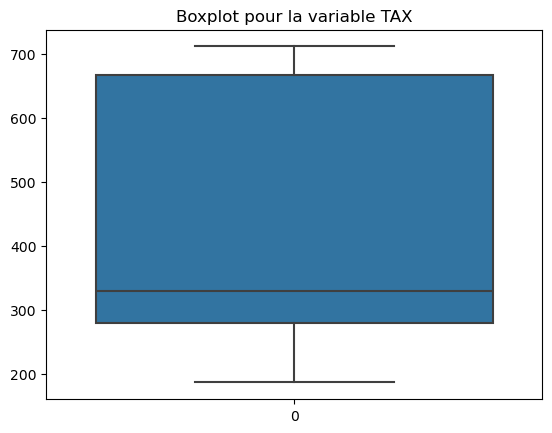

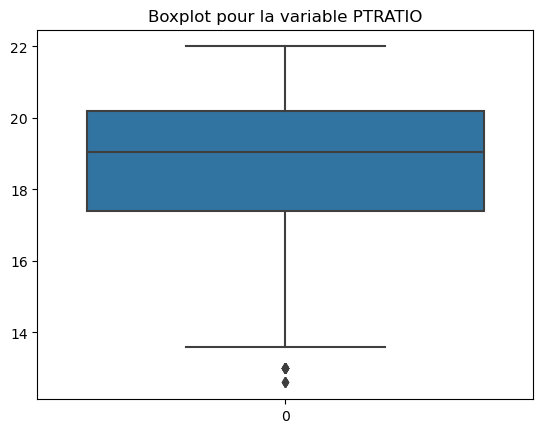

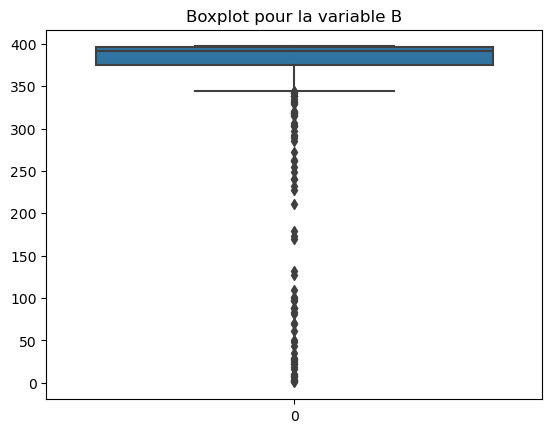

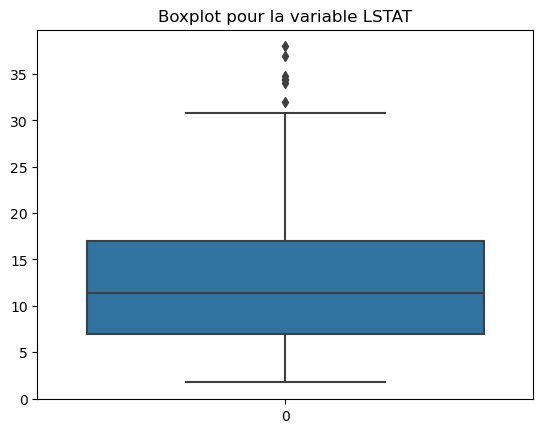

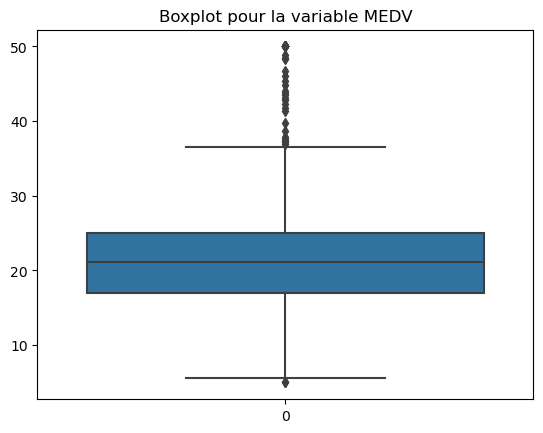

{'CRIM':         CRIM   ZN  INDUS CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
 367  13.5222  0.0   18.1    0  0.631  3.863  100.0  1.5106   24  666.0   
 371   9.2323  0.0   18.1    0  0.631  6.216  100.0  1.1691   24  666.0   
 373  11.1081  0.0   18.1    0  0.668  4.906  100.0  1.1742   24  666.0   
 374  18.4982  0.0   18.1    0  0.668  4.138  100.0  1.1370   24  666.0   
 375  19.6091  0.0   18.1    0  0.671  7.313   97.9  1.3163   24  666.0   
 ..       ...  ...    ...  ...    ...    ...    ...     ...  ...    ...   
 468  15.5757  0.0   18.1    0  0.580  5.926   71.0  2.9084   24  666.0   
 469  13.0751  0.0   18.1    0  0.580  5.713   56.7  2.8237   24  666.0   
 477  15.0234  0.0   18.1    0  0.614  5.304   97.3  2.1007   24  666.0   
 478  10.2330  0.0   18.1    0  0.614  6.185   96.7  2.1705   24  666.0   
 479  14.3337  0.0   18.1    0  0.614  6.229   88.0  1.9512   24  666.0   
 
      PTRATIO       B  LSTAT  MEDV  
 367     20.2  131.42  13.33  23.1  
 371     20.2  3

In [155]:
valeurs_extremes(liste_variable_quanti)

# technique de Z-score

In [178]:
from scipy import stats
Outlier_Zcore_dict = {}

for i in liste_variable_quanti:
    
    Zscore = stats.zscore(df[i])
    Outliers_Zscore = df[abs(Zscore)>3]
    
    # si les valeurs extremes n'existe pas pour cette variable
    if not Outliers_Zscore.empty:
        
        # stocke les outliers dans le dictionaire unique si il y'en a
        Outlier_Zcore_dict[i] = Outliers_Zscore
    else:
        print(f"aucun outlier pour la variable {i}")

Outlier_Zcore_dict

    


        

aucun outlier pour la variable INDUS
aucun outlier pour la variable NOX
aucun outlier pour la variable AGE
aucun outlier pour la variable RAD
aucun outlier pour la variable TAX
aucun outlier pour la variable PTRATIO
aucun outlier pour la variable MEDV


{'CRIM':         CRIM   ZN  INDUS CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
 380  88.9762  0.0   18.1    0  0.671  6.968   91.9  1.4165   24  666.0   
 398  38.3518  0.0   18.1    0  0.693  5.453  100.0  1.4896   24  666.0   
 404  41.5292  0.0   18.1    0  0.693  5.531   85.4  1.6074   24  666.0   
 405  67.9208  0.0   18.1    0  0.693  5.683  100.0  1.4254   24  666.0   
 410  51.1358  0.0   18.1    0  0.597  5.757  100.0  1.4130   24  666.0   
 414  45.7461  0.0   18.1    0  0.693  4.519  100.0  1.6582   24  666.0   
 418  73.5341  0.0   18.1    0  0.679  5.957  100.0  1.8026   24  666.0   
 427  37.6619  0.0   18.1    0  0.679  6.202   78.7  1.8629   24  666.0   
 
      PTRATIO       B  LSTAT  MEDV  
 380     20.2  396.90  17.21  10.4  
 398     20.2  396.90  30.59   5.0  
 404     20.2  329.46  27.38   8.5  
 405     20.2  384.97  22.98   5.0  
 410     20.2    2.60  10.11  15.0  
 414     20.2   88.27  36.98   7.0  
 418     20.2   16.45  20.62   8.8  
 427     20.2   18.

Technique de traitement des outlier

- suppression des valeur extreme:
  
 a appliquer en dernier recour apres avoir parcouru toute les autres. cela n'est pas sistematique car avant de supprimer les données il faut le justifier

- transformation logarithmique:

  cette technique peut etre utiliser pour atenuer l'effet des valeurs extremes, mais encore il va valoir mieux discuter avec les metiers

- transformation BOX-COX

- Discretisation

on converti la variable quanti en variable quali reduisant ainsi l'impact des valeurs aberrante
ainsi on simplifie l'analyse , mais on peut avoir une perte d'information



NOTA: question d'eviter une perte d'information significative je fais mon modele avec toutes ces valeurs aberantes sans les traiter puis je le fais avec toutes les valeurs aberantes traitées pour me rassurer :
  si le fait d'avoir traité les outlier a un impact sur les performances de mon modèles.